Test the behavious of the package when different modes are selects, and
for different retardatio ratios

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# testing WAM for various retardatio ratios

#from importlib import reload
import curses    ####  pip install windows-curses
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

import specsanalyzer

#load the module and import functions for reading the parameter table from the calib2d file
import specsanalyzer.convert
#let's get all the functions to be tested
from specsanalyzer import SpecsAnalyzer
from specsanalyzer.convert import get_damatrix_fromcalib2d
from specsanalyzer.convert import get_rr_da
from specsanalyzer.convert import calculate_polynomial_coef_da
from specsanalyzer.convert import mcp_position_mm
from specsanalyzer.convert import calculate_matrix_correction


spa = SpecsAnalyzer(config="../tests/data/dataEPFL/config/config.yaml")
config_dict=spa.config
lens_mode="WideAngleMode"
kinetic_energy=35.000000
pass_energy=35.000000
work_function=4.3
binning=4

eshift = np.array(config_dict[
        "calib2d_dict"
    ]["eShift"])

aInner, damatrix = get_damatrix_fromcalib2d(
    lens_mode,
    kinetic_energy,
    pass_energy,
    work_function,
    config_dict,
    )

dapolymatrix = calculate_polynomial_coef_da(
    damatrix,
    kinetic_energy,
    pass_energy,
    eshift)




In [7]:
# testing ..
# check the behaviour for various lens modes
lensmodes=["WideAngleMode","LowAngularDispersion",]
lensmodes


# the following modes do not have angular resolution: how to treat them?
# note that they also return an image with different axis coordinates


['WideAngleMode', 'ciao']

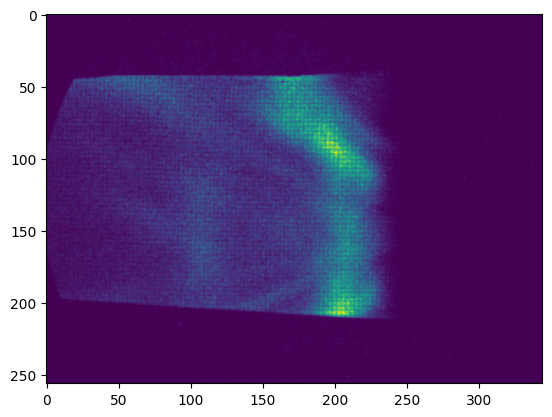

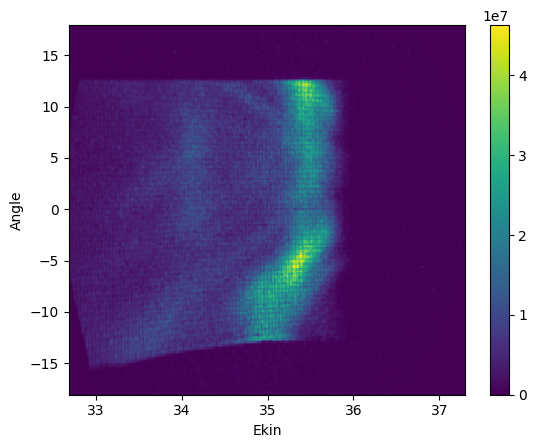

In [8]:
with open('../tests/data/dataEPFL/R9132/Data9132_RAWDATA.tsv') as file:
    tsv_data = np.loadtxt(file, delimiter='\t')
plt.figure()
plt.imshow(tsv_data)
# Testing convert and crop on the imported data
spa = SpecsAnalyzer(config="../tests/data/dataEPFL/config/config.yaml")

lens_mode="WideAngleMode"
kinetic_energy=35.0
pass_energy=35.0
work_function=4.2

res_xarray = spa.convert_image(tsv_data, lens_mode, kinetic_energy, pass_energy, work_function)
plt.figure()
res_xarray.plot(cmap='viridis',vmin=0)